# Random forest classifier

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


file = "C:/Users/NARENDRA/Downloads/The Lannister Data Chronicles_ Decrypting Diabetes.csv"
df = pd.read_csv(file)


X = df.drop(columns=['Diabetes_012'])
y = df['Diabetes_012']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = RandomForestClassifier(n_estimators=150, random_state=100)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8424


# Testing on custom datapoints

In [23]:
def predict_custom_data(custom_data):
    custom_data_df = pd.DataFrame(custom_data, index=[0])
    prediction = model.predict(custom_data_df)
    
    return prediction


custom_data = {
    'HighBP': 1,
    'HighChol': 1,
    'CholCheck': 1,
    'BMI': 20,
    'Smoker': 0,
    'Stroke': 0,
    'HeartDiseaseorAttack': 0,
    'PhysActivity': 1,
    'Fruits': 1,
    'Veggies': 1,
    'HvyAlcoholConsump': 0,
    'AnyHealthcare': 1,
    'NoDocbcCost': 0,
    'GenHlth': 3,
    'MentHlth': 2,
    'PhysHlth': 5,
    'DiffWalk': 0,
    'Sex': 1,
    'Age': 7,
    'Education': 4,
    'Income': 5
}

custom_prediction = predict_custom_data(custom_data)

print('Prediction for custom input data:', custom_prediction)
if(custom_prediction==0):
    print('Person has no diabetes')
elif(custom_prediction==1):
    print('Person is pre diabeteic')
else:
    print('Person is diabetic')

Prediction for custom input data: [0]
Person has no diabetes


# Feature Importance score visualization

In [8]:
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

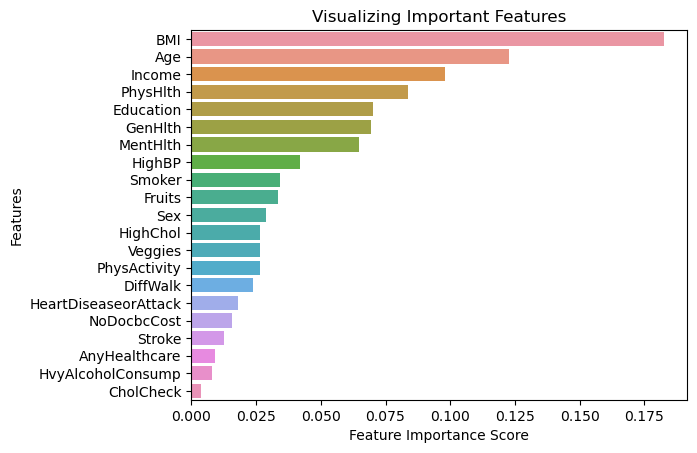

Feature scores are:


BMI                     0.182499
Age                     0.122726
Income                  0.098088
PhysHlth                0.083771
Education               0.070339
GenHlth                 0.069336
MentHlth                0.064788
HighBP                  0.041780
Smoker                  0.034325
Fruits                  0.033568
Sex                     0.028713
HighChol                0.026454
Veggies                 0.026412
PhysActivity            0.026370
DiffWalk                0.023893
HeartDiseaseorAttack    0.017896
NoDocbcCost             0.015555
Stroke                  0.012450
AnyHealthcare           0.009025
HvyAlcoholConsump       0.008150
CholCheck               0.003863
dtype: float64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

print('Feature scores are:')
feature_scores
